In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### 分类图
—— meshgrid(x,y)  返回由x,y重构的两个list二维数组，通常作为x轴和y轴的网格采样点，
    
    返回的数组：
    grid_x：axis=0广播, 每一行元素跟上一行相同，行数为y的维度
    grid_y：axis=1广播, 每一列元素跟上一列相同，列数为x的维度
    grid_x和grid_y形状一样的
    
    和 stack((grid_x,grid_y),axis =1)配合使用，构成栅格点阵坐标   ★★★
    和 pcolormesh(grid_x,grid_y,grid_label)配合使用，绘制分类图
—— plt.pcolormesh(grid_x,grid_y,grid_label,camp) 由栅格点阵坐标和其点阵标签构成，进行颜色填充，绘制分类图

    grid_label：属性标签值，这些值会被cmap映射，作为底色
    cmap :着色方案，常用 cmap=plt.cm.Paired 或 cmap='gray' ★

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]] 
 [[-1 -1 -1 -1]
 [-2 -2 -2 -2]
 [-3 -3 -3 -3]
 [-4 -4 -4 -4]]


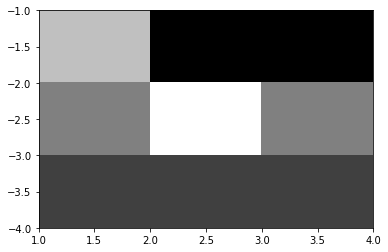

In [13]:
#1、案例一
x = np.array([1, 2, 3 ,4])
y = np.array([-1, -2, -3, -4])
grid_x,grid_y = np.meshgrid(x, y)  # 构成点阵坐标
print(grid_x,'\n',grid_y)

gird_label = np.array([[3,0,0],[2,4,2],[1,1,1]])   # 虽然后面都是要求gird_label和grid_x的形状相同，但是实际上有效的行列都要少1
# 数字不代表某一具体的颜色，只是用来区分不同色块的编号

plt.pcolormesh(grid_x, grid_y, gird_label, cmap='gray')   # 以左上角为原点，grid_x表示点横坐标，grid_y表示纵坐标，gird_label为颜色标签
plt.show()

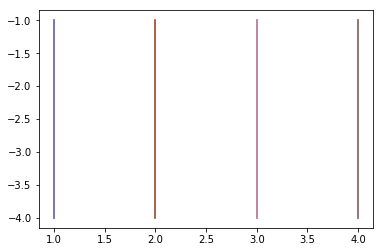

In [15]:
plt.plot(grid_x,grid_y)
plt.show()

    [array([[1, 2, 3],             
            [1, 2, 3],
            [1, 2, 3],
            [1, 2, 3]])        grid_x
    array([[-1, -1, -1],
           [-2, -2, -2],
           [-3, -3, -3],
           [-4, -4, -4]])      grid_y
plt.pcolormesh(grid_x,grid_y,...)            
            
            |---1------2------3---->    (grid_x,grid_y)组成的坐标点(x,y)将覆盖并形成(1<=x<=3,-4<=y<=-1)区间组成的2*3的矩形
            |                           由于填充时是按格子填充的，所以实际填充时，只要填充2*3区域即可
           -1  (1,-1) (2,-1) (3,-1)     但是为了方便评估数据，通常会用3*4数据
            |
           -2  (1,-2) (2,-2) (3,-2)
            |
           -3  (1,-3) (2,-3) (3,-3)
            |
           -4  (1,-4) (2,-4) (3,-4)
            |
            '''

—— np.stack((list1,list2),axis ) 将列表合并。axis=1时，按行遍历

—— plt.scatter(x,y,c,...) 绘制点

    -》x,y为点坐标，（x,y）和 c 是一一对应的
    -》c ：点颜色。当c作为属性标签值时，和camp配合使用，这些标签值会被cmap映射。这个c要写出来
    
    -》edgecolors ：点边框色
    -》s ：点的大小
    -》marker ：点形状，默认为圆，*为星星

(1800, 1440)
(1800, 1440)


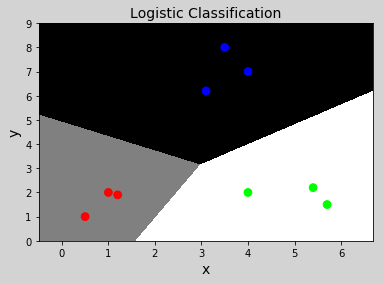

In [19]:
#2、案例二
import sklearn.linear_model as lm

x = np.array([
        [4, 7],
        [3.5, 8],
        [3.1, 6.2],
        [0.5, 1],
        [1, 2],
        [1.2, 1.9],
        [4, 2],
        [5.7, 1.5],
        [5.4, 2.2]])                                             # 散点[x,y]
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])                        # 多元分类 3类

# 逻辑回归分类器
model = lm.LogisticRegression(solver='liblinear', C=50)          # C
model.fit(x, y)

plt.figure('Logistic Classification', facecolor='lightgray')
plt.title('Logistic Classification', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)

'''
pcolormesh参数设置：
'''
l, r, h = x[:, 0].min() - 1, x[:, 0].max() + 1, 0.005            # 左边界，右边界，水平方向点间距，组成点阵的x坐标
b, t, v = x[:, 1].min() - 1, x[:, 1].max() + 1, 0.005            # 下边界，上边界，垂直方向点间距，组成点阵的y坐标

#print(np.arange(l, r, h).shape, np.arange(b, t, v).shape)       # (1440,) (1800,) shape不同，不能直接作为输入,转为
grid_x,grid_y = np.meshgrid(np.arange(l, r, h), np.arange(b, t, v))     # (m-array,n-array)--> list(x1(m,n), x2(m,n))
# 也可以用一个grid接收，用grid[0]和[1]来表示

print(grid_x.shape)                                                 # x[i, j]  (1800, 1440) <class 'numpy.ndarray'> 
print(grid_y.shape)                                                 # y[i, j]  (1800, 1440) <class 'numpy.ndarray'> 

flat_x = np.stack((grid_x.ravel(), grid_y.ravel()),axis = 1)          # 对散点进行两两组合，形成点阵坐标集flat_x
flat_y = model.predict(flat_x)                                              # 输入栅格点阵坐标，对点阵进行模型预测，以获得点阵分类集flat_y

grid_label = flat_y.reshape(grid_x.shape)                                    # 分类标签用做pcolormesh栅格着色的依据
#最终目的是，生成与grid_x形状相同的分类标签

# print(grid_label)
#[[1 1 1 ... 2 2 2]             # 0, 1, 2 分别代表三种不同颜色
# [1 1 1 ... 2 2 2]
# [1 1 1 ... 2 2 2]
# ...
# [0 0 0 ... 0 0 0]
# [0 0 0 ... 0 0 0]
# [0 0 0 ... 0 0 0]]

# pcolormesh: 分类图 pcolormesh(X, Y, C) 
# X,Y均为2-D array，X和Y构成网格点阵；如果X,Y为1-D 会自动广播，
# X,Y对应位置元素x[i,j]和y[i,j]组成一个坐标点(x[i,j],y[i,j])，对样本周围（包括样本所在坐标）的四个坐标点进行着色，C代表着色方案
plt.pcolormesh(grid_x, grid_y, grid_label, cmap='gray')       # gray_r 与gray的色带相反

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=60)            # 点图，颜色映射
plt.show()